## Занятие 6. Нелинейные модели для классификации. Выбор лучшей модели для классификации. Построение программного конвеера

Веберите любые данные для задачи классификации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте нелинейные модели в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 13/12/2021

### Импорты

In [2]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

### Данные

*Источник:* https://github.com/jbrownlee/Datasets

*Название:* **Cancer (Haberman's)**

### Описание данных

Данные о пациентах больных раком.

### Описание полей

1. **age** — возраст пациента;
1. **operation_year** — год операции 19##;
1. **axillary_nodes** — количество обнаруженных положительных узлов;
1. **survival_status** — выживаемость после операции:
    - 1 $-$ пациент прожил 5 лет и более 
    - 2 $-$ пациент умер в течение 5 лет

Смотрим на данные.

In [7]:
filename = "haberman.csv"
names = ["age", "operation_year", "axillary_nodes", "survival_status"]
dataframe = read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
dataframe.describe()

,age,operation_year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
X = array[:,0:3]
Y = array[:,3]

### k-Nearest Neighbors

In [38]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"{round(results.mean()*100, 5)} %")

70.24731 %


Значение точности вычислений алгоритмом k-ближайших соседей составляет **70%**, это означает, что этот метод хорошо подходит для классификации.

### Naive Bayes

In [39]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"{round(results.mean()*100, 5)} %")

74.51613 %


Значение точности вычислений наивным Байесовским алгоритмом составляет **75%**, это лучше чем результат полученный алгоритмом k-ближайших соседей.

### Classification and Regression Trees

In [40]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"{round(results.mean()*100, 5)} %")

67.08602 %


Значение точности вычислений алгоритмом деревьев классификации составляет **67%**, это означает, что этот метод хорошо подходит для классификации, но хуже чем предыдущие результаты.

### Выбор лучшего алгоритма машинного обучения для задачи классификации

LR: 0.748387 (0.087158)
LDA: 0.748387 (0.087158)
KNN: 0.702473 (0.047946)
CART: 0.686882 (0.087351)
NB: 0.745161 (0.079215)
SVM: 0.728710 (0.079695)


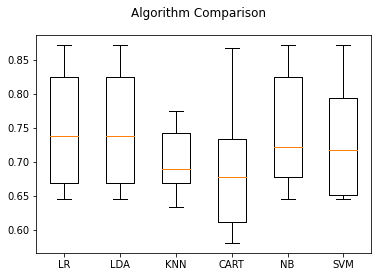

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ящик с усами – это упрощенная гистограмма, на нем можно увидеть асимметрию распределений. Мы сравнивали между собой алгоритмы логистической регрессии, линейного дискриминантного анализа, алгоритм k-ближайших соседей, алгоритм деревьев классификации, наивный Байесовский алгоритм и алгоритм опорных векторов (Support Vector Machine). Исходя из результатов, полученных на основе средней точности и величины стандартного отклонения, можно сделать о том, что самые точные значения выводят модели, сформированные алгоритмами: `LR`,`LDA`,`NB`, `SVM`.

### Программный конвеер подготовки данных и моделирования

In [41]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"{round(results.mean()*100, 5)} %")

74.83871 %


### Программный конвеер отбора признаков и моделирования

In [42]:
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=3)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"{round(results.mean()*100, 5)} %")

74.83871 %


### Выводы

Таким образом, линейные модели сработали лучше для классификации, но также можно использовать наивный Байесовский алгоритм и алогрит k-ближайших соседей.